# UCF Biomolecular Engineering Lab
## SAXS Data Modeling 

### Background 

Small-angle X-ray scattering (SAXS) is a small-angle scattering technique by which nanoscale density differences in a sample can be quantified. This means that it can determine nanoparticle size distributions, resolve the size and shape of (monodisperse) macromolecules, determine pore sizes, characteristic distances of partially ordered materials, and much more.

This notebook is designed to analyze SAXS data gathered on spherical miscelles with a Gaussian, Log-Normal, and Cylindrical size distribution. Form factor and scattering intensity equations are used to provide fitting functions that allow for greater investigation of micelle characteristics


#### The following Model Functions for Scattering are provided:
><b>Spheres with Gaussian Size Distribution</b><br>
><b>Spheres with Log-Normal Size Distribution</b><br>
><b>Spheres with Cylindrical Size Distribution</b><br>

<b>Preliminary Code </b><br>

In [11]:
import math

In [12]:
import pandas as pd

In [13]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [15]:
import xlrd

In [16]:
from scipy.integrate import quad

In [33]:
import sys

### Spheres with Gaussian Size Distribution

<b>Scatterplot</b><br>

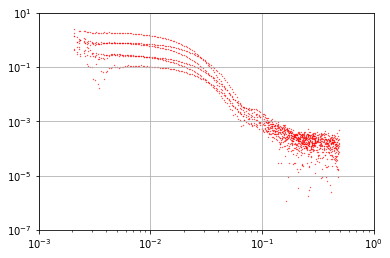

In [20]:
sample_data = pd.read_csv('Data_Master.csv')
plt.subplot(111)
plt.scatter(sample_data.q,sample_data.r, s = 0.1, c = 'red')
plt.xlim(0.001, 1)
plt.ylim(0.0000001, 10)
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

### Gaussian Sphere Modeling Function Parameters 
><b>Scale Factor</b><br>
><b>Volume Fraction</b><br>
><b>Mean radius</b><br>
><b>Polydispersity</b><br>
><b>SLD sphere</b><br>
><b>SLD solvent</b><br>
><b>Form Factor</b><br>

Gaussian Distribution: ![title](A.png)
Scattering Amplitude: ![title](B.png)
Scattering Intensity: ![title](C.png)

In [18]:
sample_data = pd.read_csv('sample_data.csv')
scatteringfunction = pd.read_csv('scatteringfunctionTEST2.csv')
workbook = xlrd.open_workbook('sample_data.xlsx')

worksheet = workbook.sheet_by_index(0)

# Read in all q and r values from excel spreadsheet
spreadsheet = [[worksheet.cell_value(i,j) for i in range (1, worksheet.nrows)]
                                          for j in range (0,3)]

In [4]:
def gaussianDistribution(sigma, R, Ravg):
    fR = (1/((sigma)*math.sqrt(2*math.pi)))*math.exp((-1/(2*(sigma**2)))*(R-Ravg)**2)
    return fR

In [5]:
def scatteringAmplitude(q, R):
    FqR = (3*(math.sin(q*R)-(q*R)*math.cos(q*R)))/((q*R)**3)
    return FqR

In [6]:
def integrand(q, R):
    return gaussianDistribution(sigma, R, Ravg)*(R**6)*(scatteringAmplitude(q, R))**2

In [37]:
def scatteringFunction(Volume_Fraction, deltaRho, sigma, R, Ravg):
    for i in range (1, worksheet.nrows):
        for j in range (0,1):
            q = spreadsheet[0][i-1]
            integral = [quad(integrand, 0, np.inf, args=(q))] 
            qScatteringFunction = ((((4*math.pi)/3)**2)*Volume_Fraction*(deltaRho**2))*(integral[0][0])
            print(qScatteringFunction)
        

<b>Scatterplot</b><br>

ValueError: x and y must be the same size

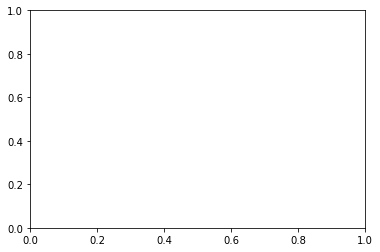

In [38]:
#scatteringFunction(Volume_Fraction, deltaRho, sigma, R, Ravg)
plotSphericalMicelles(scatteringfunction, sample_data)

def plotSphericalMicelles(scatteringfunction, sample_data):
    plt.subplot(111)
    plt.scatter(scatteringfunction, sample_data, s = 0.9, c = 'red')
    plt.ylim(1*10**-35, 1*10**5)
    plt.xlim(0.002, 0.600)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('q ($Å^{-1}$)', fontsize = 12)
    plt.ylabel('Intensity ($cm^{-1}$)', fontsize = 12)
    plt.grid(True)

### Spheres with Log-Normal Size Distribution

<b>Scatterplot</b><br>

In [30]:
sample_data = pd.read_csv('Data_Master.csv')
plt.subplot(111)
plt.scatter(sample_data.q,sample_data.r, s = 0.1, c = 'red')
plt.xlim(0.001, 1)
plt.ylim(0.0000001, 10)
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.close()

### References



    
    



[1] Heenan, R. (2016). Polymer_micelle. Retrieved February 15, 2021, from https://www.sasview.org/docs/user/models/polymer_micelle.html